 ÖĞRENME NEDİR?

ÖRNEK 1:
 elimizde bir reklam var.
 200 farklı pazarda yapılan TV, radio ve newspaper reklam harcamaları sonucu gerçekleşen satışı görüyoruz.
 Amacımız, gelecekte ne kadar ne kadar reklam bütçesi ile tahmini olarak ne kadar satış yapabileceğimizi göreceğiz.

 GİRDİ DEĞİŞKENLERİ -> harcama tutarı - USD(TV,Radio,Newspaper) -> Input,Features

 ÇIKTI DEĞİŞKENLERİ -> satış miktarı - Adet(sales) -> Output,label

 x1 : TV
 x2 : Radio
 x3 : Newspaper
 y  : Sales

In [18]:
#kütüphaneyi import edelim
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
#datayı oku
df = pd.read_csv('data/Advertising.csv',index_col=0)

In [10]:
#describe
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
#head
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [13]:
#input
x_1 = df['TV']
x_2 = df['radio']
x_3 = df['newspaper']

In [14]:
#x_1
x_1

1      230.1
2       44.5
3       17.2
4      151.5
5      180.8
       ...  
196     38.2
197     94.2
198    177.0
199    283.6
200    232.1
Name: TV, Length: 200, dtype: float64

In [15]:
#ilk değişken tipi
type(x_1)

pandas.core.series.Series

In [16]:
#ilk değişken şekli
x_1.shape

(200,)

In [17]:
#output
y = df['sales']

In [19]:
#regresyon için hazırlık yap
linear_regressor =  LinearRegression()

In [20]:
#dataframe'lerin şeklini düzenle -> output
y_r = y.values.reshape(-1,1)

In [21]:
#orjinalden çıktıların şekli (satır,sutun)
y.shape

(200,)

In [22]:
#yeniden boyutlanmış çıktının şekli
y_r.shape

(200, 1)

In [24]:
#dataframe'lerin şeklini düzenle -> input
x_1_r = x_1.values.reshape(-1,1)
x_2_r = x_2.values.reshape(-1,1)
x_3_r = x_3.values.reshape(-1,1)

In [25]:
x_2_r.shape

(200, 1)

Text(0.5, 1.0, 'satış - TV')

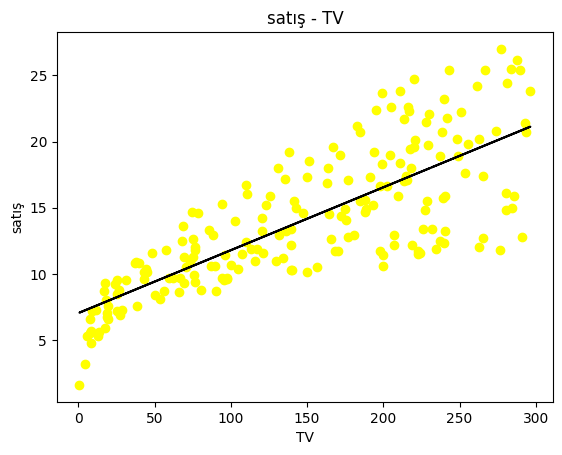

In [29]:
#satış - TV
#data-> x_1
plt.scatter(x_1, y, c ='yellow')

# regresyon
linear_regressor.fit(x_1_r,y_r)
y_pred_1 = linear_regressor.predict(x_1_r)
plt.plot(x_1, y_pred_1, color='black')

plt.xlabel('TV')
plt.ylabel('satış')
plt.title('satış - TV')

Text(0.5, 1.0, 'Satış_Radio')

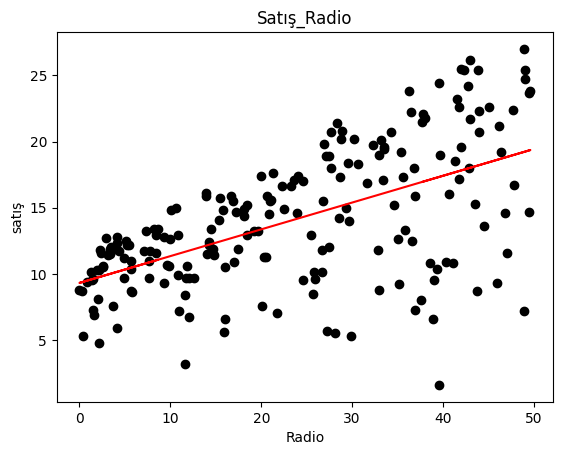

In [32]:
#satış - Radio

#data -> x_2
plt.scatter(x_2,y,c='black')

#regresyon
linear_regressor.fit(x_2_r,y_r)
y_pred_2 = linear_regressor.predict(x_2_r)
plt.plot(x_2, y_pred_2, color ='red')

plt.xlabel('Radio')
plt.ylabel('satış')
plt.title('Satış_Radio')

Text(0.5, 1.0, 'satış_newspaper')

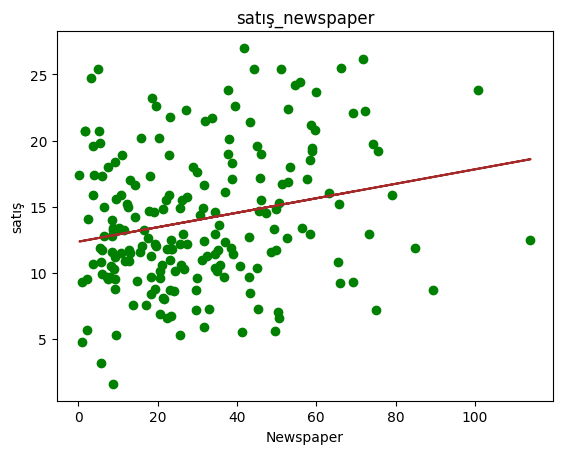

In [33]:
#satış - NEWSPAPER

#data -> x_3
plt.scatter(x_3,y,c='green')

#regresyon
linear_regressor.fit(x_3_r,y_r)
y_pred_3 = linear_regressor.predict(x_3_r)
plt.plot(x_3, y_pred_3, color='brown')

plt.xlabel('Newspaper')
plt.ylabel('satış')
plt.title('satış_newspaper')

genel olarak şöyle düşünelim:

y ile x arasında şu şekilde bir ilişki olduğunu kabul edelim:

Y = f(x) + £

Burada :
f(): ne olduğu bilinmeyen bir fonksiyon
£  : Rasgele hata miktarı(error term) -> ölçüm hatası, insan hatası vs. 

ÖRNEK 2:
Gelir ile Eğitim Düzeyi arasındaki ilişkiye bakalım şimdi.

Elimizde 30 çalışana ait Gelir (Income) ve eğitim yılı(Education) bilgisi var.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [37]:
income = pd.read_csv('data/Income.csv',index_col=0)

In [38]:
income.head(5)

,Education,Income
1,10.000000,26.658839
2,10.401338,27.306435
3,10.842809,22.132410
4,11.244147,21.169841
5,11.645485,15.192634


In [39]:
#input
x = income['Education']

In [40]:
# output
y= income['Income']

In [41]:
#regreson için hazırlık
#reshape dataframes

x_r = x.values.reshape(-1,1)
y_r = y.values.reshape(-1,1)

Text(0.5, 1.0, 'income-education')

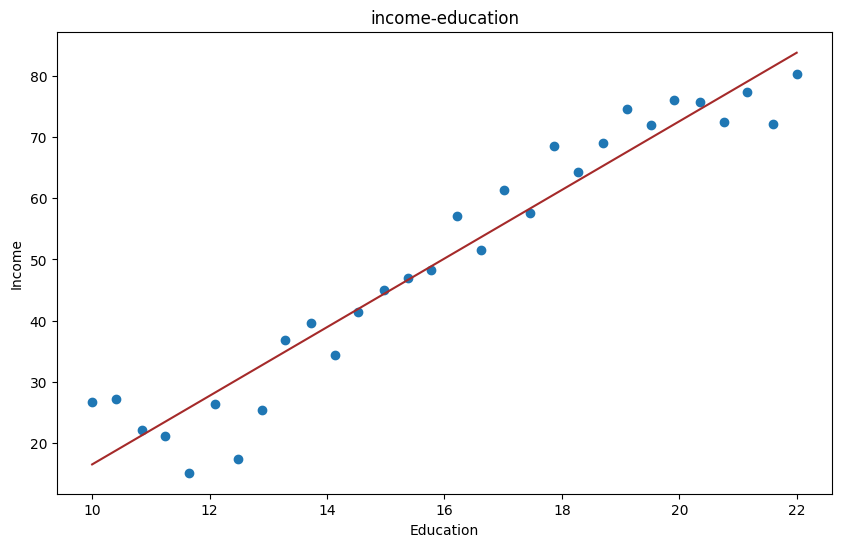

In [43]:
#grafik - lineer Regression

#data 
plt.figure(figsize=(10,6))
plt.scatter(x,y)

# regresyon
lr = LinearRegression()
lr.fit(x_r, y_r)
y_pred = lr.predict(x_r)
plt.plot(x, y_pred, color = 'brown')

plt.xlabel('Education')
plt.ylabel('Income')
plt.title('income-education')


gördüğünüz gibi doğrusal (linear regression) çizdiğimiz için çok oturmadı veriye.

eğer daha yüksek dereceli (4.derece) bir polinom olarak modelleseydik: